<a href="https://colab.research.google.com/github/Isha03Shukla/-Online-retail-Orders-Analysis/blob/main/HRC60189WK_Isha_Shukla_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Payment Date Prediction


### Importing related Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
#import matplotlib.pyplot as plt

### Store the dataset into the Dataframe


In [2]:
#from google.colab import files #uploding dataset from local drive
#uploaded = files.upload()
url = 'https://raw.githubusercontent.com/Isha03Shukla/HighRadius/main/dataset.csv?token=GHSAT0AAAAAACTXWXHKNGPJOCCK3EC5RVHCZV3B6BQ'
data = pd.read_csv(url)

In [3]:
#data=pd.read_csv("dataset.csv") #reading csv file, here dataframe name is data

### Check the shape of the dataframe


In [4]:
data.shape #Shape is a tuple of integers reperesenting the size of the dataset in each dimension.

(50000, 19)

### Check the Detail information of the dataframe

In [5]:
data.info() #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [6]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
print(data.columns.values.tolist()) #Using tolist() to Print the Names as a List

['business_code', 'cust_number', 'name_customer', 'clear_date', 'buisness_year', 'doc_id', 'posting_date', 'document_create_date', 'document_create_date.1', 'due_in_date', 'invoice_currency', 'document type', 'posting_id', 'area_business', 'total_open_amount', 'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen']


### Describe the entire dataset

In [9]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [10]:
data.head() #head() method is used to return top n (5 by default) rows of a dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [11]:
percentage = data.isnull().sum() * 100 / len(data)
print(percentage)

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [12]:
data.loc[:,['invoice_id','doc_id']] #loc is label-based, which means that you have to specify rows and columns based on their row and column labels.


,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [13]:
data.loc[:,['baseline_create_date','document_create_date','document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


In [14]:
# Concatenate the columns and then find the number of unique values
uniqueValues = pd.concat([data['baseline_create_date'], data['document_create_date'], data['document_create_date.1']]).nunique()

print(uniqueValues)

511


In [16]:
data['document_create_date'].unique()

array([20200125, 20190722, 20190914, 20200330, 20191113, 20190920,
       20191031, 20200318, 20190605, 20190219, 20200306, 20190102,
       20190415, 20191017, 20200415, 20200423, 20191025, 20191202,
       20191114, 20200124, 20200107, 20190822, 20200320, 20190717,
       20200123, 20190114, 20200302, 20190423, 20190416, 20190418,
       20190921, 20190909, 20190625, 20190701, 20200401, 20190121,
       20200420, 20190615, 20190604, 20191108, 20200104, 20200120,
       20200222, 20190412, 20200325, 20190414, 20190808, 20200216,
       20190117, 20190507, 20200313, 20200506, 20190724, 20200113,
       20200213, 20190827, 20200311, 20190715, 20190315, 20190630,
       20190609, 20190708, 20190506, 20190606, 20190426, 20190130,
       20190819, 20200327, 20190325, 20190613, 20190221, 20191109,
       20200227, 20200410, 20190502, 20200408, 20190314, 20190603,
       20200312, 20200329, 20190912, 20190629, 20190929, 20190820,
       20190304, 20190728, 20200328, 20200406, 20200114, 20191

In [17]:
data['document_create_date.1'].unique()

array([20200126, 20190722, 20190914, 20200330, 20191113, 20190920,
       20191101, 20200319, 20190607, 20190220, 20200311, 20190102,
       20190415, 20191017, 20200415, 20200423, 20191025, 20191202,
       20191115, 20200124, 20200111, 20190821, 20200321, 20190717,
       20200306, 20190114, 20200302, 20190423, 20190416, 20190418,
       20190922, 20190910, 20190615, 20190705, 20200407, 20190123,
       20190617, 20190604, 20191108, 20200104, 20200122, 20200222,
       20190412, 20200325, 20190808, 20200217, 20190118, 20190507,
       20200313, 20200506, 20190724, 20200115, 20200218, 20190828,
       20200312, 20190716, 20200121, 20190315, 20190630, 20190610,
       20190708, 20190506, 20190606, 20190426, 20200114, 20190201,
       20190819, 20200327, 20190124, 20190327, 20190613, 20191110,
       20200228, 20200410, 20190502, 20200409, 20190602, 20190912,
       20200416, 20190929, 20190304, 20190822, 20190728, 20200329,
       20200406, 20191125, 20200211, 20190723, 20190618, 20200

#### Please check, Column 'posting_id' is constant columns or not


In [18]:
data.posting_id.nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [19]:
data.isOpen.nunique() #The nunique() method returns the number of unique values for each column

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type'
- 'document_create_date.1

In [20]:
data.drop(['area_business', 'posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'], axis=1, inplace=True)

### Please check from the dataframe whether all the columns are removed or not

In [21]:
data.tail(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8
49991,U001,0200704045,RA trust,2019-10-25 00:00:00,2019.0,1.930001e+09,2019-10-10,20191025.0,USD,73002.24,20191010.0,NAA8
49992,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,20200409.0,USD,1998.64,20200325.0,NAA8
49993,U001,0200726979,BJ'S,2020-03-25 00:00:00,2020.0,1.930378e+09,2020-01-08,20200123.0,USD,31.62,20200108.0,NAA8
49994,U001,0200762301,C&S WH trust,2019-07-25 00:00:00,2019.0,1.929601e+09,2019-07-10,20190725.0,USD,84780.40,20190710.0,NAC6
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8
49999,U001,0200020431,DEC corp,2019-01-15 00:00:00,2019.0,1.928576e+09,2019-01-05,20190124.0,USD,1790.30,20190101.0,NAM4


### Show all the Duplicate rows from the dataframe

In [22]:
data[data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [23]:
data.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [24]:
data.drop_duplicates(keep=False,inplace=True)# dropping duplicate values

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [25]:
data.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [26]:
data.shape

(47692, 12)

### Find out the total count of null values in each columns

In [27]:
data.isnull().sum()#Count missing values for each column of the dataframe

,0
business_code,0
cust_number,0
name_customer,0
clear_date,9367
buisness_year,0
doc_id,0
posting_date,0
due_in_date,0
invoice_currency,0
total_open_amount,0


#Data type Conversion

### Please check the data type of each column of the dataframe

In [28]:
data.dtypes

,0
business_code,object
cust_number,object
name_customer,object
clear_date,object
buisness_year,float64
doc_id,float64
posting_date,object
due_in_date,float64
invoice_currency,object
total_open_amount,float64


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date
- baseline_create_date

In [29]:
cd=data['clear_date'].dtype
pd=data['posting_date'].dtype
dd=data.due_in_date.dtype
bd=data['baseline_create_date'].dtype
print("clear_date: ",cd,"\nposting_date: ",pd,"\ndue_in_date: ",dd,"\nbaseline_create_date: ",bd)

clear_date:  object 
posting_date:  object 
due_in_date:  float64 
baseline_create_date:  float64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [30]:
data['clear_date'] = data['clear_date'].astype('datetime64[ns]')
data['posting_date'] = data['posting_date'].astype('datetime64[ns]')
data['due_in_date'] = data['due_in_date'].astype('datetime64[ns]')
data['baseline_create_date'] = data['baseline_create_date'].astype('datetime64[ns]')

In [31]:

#import pandas as pd

#data['clear_date'] = pd.to_datetime(data['clear_date'], format='%Y-%m-%d')
#data['posting_date'] = pd.to_datetime(data['posting_date'], format='%Y-%m-%d')
#data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
#data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format='%Y%m%d')
#data[['clear_date','posting_date','baseline_create_date','due_in_date']].head()

### Please check the datatype of all the columns after conversion of the above 4 columns

In [32]:
data.dtypes

,0
business_code,object
cust_number,object
name_customer,object
clear_date,datetime64[ns]
buisness_year,float64
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
invoice_currency,object
total_open_amount,float64


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency

In [33]:
data['invoice_currency'].value_counts() #value_counts() function returns object containing counts of unique values

,count
invoice_currency,
USD,43953
CAD,3739


#### display the "total_open_amount" column value

In [34]:
data['total_open_amount'].sum()

1540720067.95

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [35]:
data['converted_usd']=np.where(data['invoice_currency']=="CAD",data['total_open_amount']*0.7,data['total_open_amount'])

### Display the new "converted_usd" column values

In [36]:
data['converted_usd'].tolist()

[54273.28,
 79656.6,
 2253.86,
 2309.7899999999995,
 33133.29,
 15558.088,
 7358.49,
 11173.02,
 15995.04,
 28.63,
 3525.59,
 103147.37,
 16381.45,
 19581.57,
 121105.65,
 3726.06,
 5181.51,
 19082.14,
 12819.5,
 53349.54,
 5683.5,
 11845.19,
 5893.01,
 20079.58,
 11307.78,
 64982.589,
 36188.11,
 11380.83,
 412.09,
 33889.295999999995,
 6023.53,
 17307.51,
 341.14,
 365.87,
 32751.88,
 3863.93,
 39221.31,
 74453.01,
 46961.92,
 51641.33,
 52187.72,
 4953.83,
 54714.07,
 3228.13,
 22200.821999999996,
 138.6,
 34565.51,
 65353.0,
 49723.89,
 353.96,
 3435.96,
 32715.47,
 174.72,
 21418.85,
 12606.72,
 25580.96,
 20360.19,
 767.78,
 322.48,
 91102.25,
 73077.72,
 1979.46,
 3285.62,
 4838.4,
 24351.25,
 22491.08,
 981.31,
 71008.69,
 8445.33,
 79935.8,
 1980.7199999999998,
 13636.19,
 3748.84,
 74898.29,
 6300.98,
 14514.68,
 55400.31,
 26520.18,
 174766.36,
 75138.42,
 35863.912,
 31512.75,
 19701.55,
 42362.3,
 6347.86,
 48129.8,
 132.72,
 5957.04,
 423.47,
 32415.05,
 1328.25,
 116300.

In [37]:
data.shape

(47692, 13)

### Display year wise total number of record

- Note -  use "buisness_year" column for this

In [38]:
data.groupby('buisness_year')['buisness_year'].count()

,buisness_year
buisness_year,
2019.0,33242
2020.0,14450


### Write the code to delete the following columns

- 'invoice_currency'
- 'total_open_amount',

In [39]:
data.drop(["invoice_currency", "total_open_amount"], axis = 1, inplace = True)# dropping passed columns

### Write a code to check the number of columns in dataframe

In [40]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

In [41]:
n = len(data.columns) #length of the column
print("Number of columns is:",n)

Number of columns is: 11


# Splitting the Dataset

### Look for all columns containing null value

- Note - Output expected is only one column

In [42]:
data.columns[data.isnull().any()].tolist()

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [43]:
data['clear_date'].isnull().sum()

9367

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset )
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset )

In [44]:
maindata=data[data.clear_date.notnull()]
nulldata=data[data.clear_date.isna()]

### Check the number of Rows and Columns for both the dataframes

In [45]:
maindata.shape

(38325, 11)

In [46]:
nulldata.shape

(9367, 11)

### Display the 5 records from maindata and nulldata dataframes

In [47]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088


In [48]:
nulldata.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,1970-01-01 00:00:00.020200325,1970-01-01 00:00:00.020200310,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,1970-01-01 00:00:00.020200518,1970-01-01 00:00:00.020200503,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,1970-01-01 00:00:00.020200409,1970-01-01 00:00:00.020200325,NAA8,1998.64
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,1970-01-01 00:00:00.020200506,1970-01-01 00:00:00.020200421,NAA8,3187.86


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date"
- Formula - Delay = clear_date - due_in_date

In [49]:
maindata['Delay']=maindata["clear_date"]-maindata["due_in_date"]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [50]:
avgdelay=maindata.groupby("name_customer")['Delay'].mean(numeric_only=False)

In [51]:
maindata['avg_delay']=maindata['name_customer'].map(avgdelay)
print(maindata['avg_delay'])

0       18112 days 15:23:38.678033152
1       18165 days 23:59:59.979809280
2       18178 days 11:59:59.979806208
4       18117 days 18:19:55.551763712
5       18209 days 06:51:25.694092544
                     ...             
49994      18109 days 14:23:59.979808
49996   18115 days 07:21:03.902326272
49997   18131 days 22:51:25.694094080
49998   18099 days 13:50:46.133654272
49999   18109 days 15:33:37.562225664
Name: avg_delay, Length: 38325, dtype: timedelta64[ns]


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [52]:
maindata['avg_delay'] =maindata.avg_delay.dt.total_seconds()

### Display the maindata dataframe

In [53]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280,18302 days 23:59:59.979799790,1.564932e+09
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600,18115 days 23:59:59.979809189,1.569542e+09
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860,18259 days 23:59:59.979809071,1.570622e+09
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290,18224 days 23:59:59.979808872,1.565375e+09
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088,18233 days 23:59:59.979808996,1.573282e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,1970-01-01 00:00:00.020190725,1970-01-01 00:00:00.020190710,NAC6,84780.400,18101 days 23:59:59.979809275,1.564669e+09
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,1970-01-01 00:00:00.020190830,1970-01-01 00:00:00.020190815,NAH4,6766.540,18141 days 23:59:59.979809170,1.565162e+09
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,1970-01-01 00:00:00.020200305,1970-01-01 00:00:00.020200219,NAA8,6120.860,18325 days 23:59:59.979799695,1.566601e+09
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,1970-01-01 00:00:00.020191212,1970-01-01 00:00:00.020191127,NAA8,63.480,18241 days 23:59:59.979808788,1.563803e+09


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe

In [54]:
maindata.drop(["Delay", "clear_date"], axis = 1, inplace = True)# dropping passed columns

In [55]:
maindata

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280,1.564932e+09
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600,1.569542e+09
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860,1.570622e+09
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290,1.565375e+09
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088,1.573282e+09
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,1970-01-01 00:00:00.020190725,1970-01-01 00:00:00.020190710,NAC6,84780.400,1.564669e+09
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,1970-01-01 00:00:00.020190830,1970-01-01 00:00:00.020190815,NAH4,6766.540,1.565162e+09
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,1970-01-01 00:00:00.020200305,1970-01-01 00:00:00.020200219,NAA8,6120.860,1.566601e+09
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,1970-01-01 00:00:00.020191212,1970-01-01 00:00:00.020191127,NAA8,63.480,1.563803e+09


# Splitting of Train and the Test Data

In [56]:
from sklearn.model_selection import train_test_split

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [57]:
y=maindata["avg_delay"]

In [58]:
X = maindata.drop(columns = 'avg_delay')

#### You are expected to split both the dataframes into train and test format in 60:40 ratio

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format

In [59]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y,test_size=0.4, random_state=0) #defining the test data as 40% of the data

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [60]:
#Check to see if it's a 60:40 split
print(len(X_train))
print(len(X_loc_test))
print(len(y_train))
print(len(y_loc_test))
#X_train.shape,X_loc_test.shape,y_train.shape,y_loc_test.shape

22995
15330
22995
15330


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [61]:
X_val, X_test = train_test_split(X_loc_test,test_size=.50,shuffle=False,random_state=0)
y_val, y_test = train_test_split(y_loc_test,test_size=.50,shuffle=False,random_state=0)

### Please check for the number of rows and columns of all the 4 dataframes

In [62]:
#Check to see if it's a 50:50 split
print(len(X_val))
print(len(X_loc_test))
print(len(y_val))
print(len(y_loc_test))

7665
15330
7665
15330


# Exploratory Data Analysis (EDA)

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable

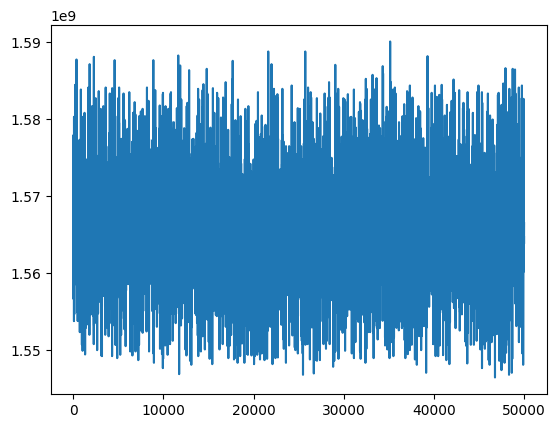

<Figure size 2000x2000 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(y)
plt.figure(figsize=(20,20))
plt.show()
#sns.displot(y,kde=False,color='y')
#sns.distplot(y)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [64]:
doc_id=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

Text(0.5, 1.0, 'Distribution Plot of doc_id')

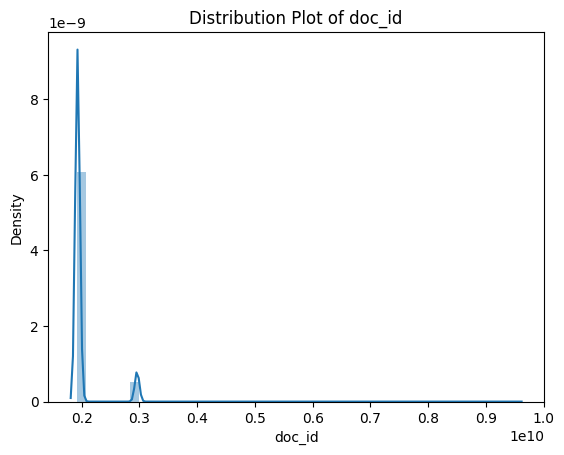

In [65]:

#sns.displot(data=maindata,x="doc_id")
#plt.plot(X_train['buisness_year'])
#plt.plot()
sns.distplot(X_train.doc_id)
plt.title('Distribution Plot of doc_id')

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


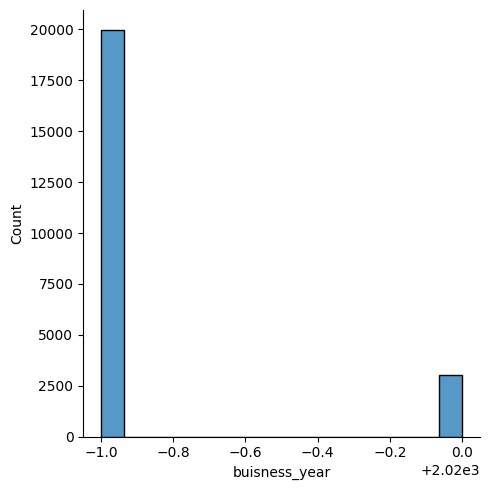

In [66]:
#plt.plot(X_train["buisness_year"])
#plt.show()
sns.displot(data=X_train, x="buisness_year")

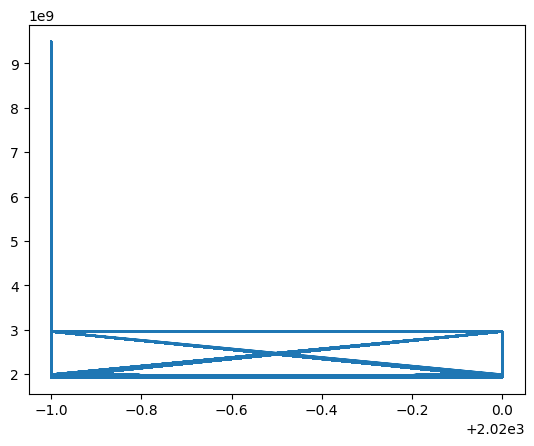

In [67]:
plt.plot(X_train["buisness_year"], X_train["doc_id"])
plt.show()
#sns.displot(data=X_train, x="buisness_year",y="doc_id")

# Feature Engineering

### Display and describe the X_train dataframe

In [68]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
39382,U001,0200744019,TARG,2019.0,1.929643e+09,2019-07-20,1970-01-01 00:00:00.020190804,1970-01-01 00:00:00.020190720,NAA8,6000.290
38920,U001,0200762301,C&S WH trust,2019.0,1.929223e+09,2019-04-29,1970-01-01 00:00:00.020190514,1970-01-01 00:00:00.020190429,NAC6,158441.310
10778,U001,0200769623,WAL-MAR in,2020.0,1.930413e+09,2020-01-19,1970-01-01 00:00:00.020200203,1970-01-01 00:00:00.020200119,NAH4,568.940
37300,U001,CCU002,KRFT FDS foundation,2020.0,1.930525e+09,2020-02-15,1970-01-01 00:00:00.020200321,1970-01-01 00:00:00.020200215,NAG2,3685.120
32158,U001,0200769623,WAL-MAR in,2019.0,1.929125e+09,2019-04-11,1970-01-01 00:00:00.020190426,1970-01-01 00:00:00.020190411,NAH4,14328.830
...,...,...,...,...,...,...,...,...,...,...
27002,U001,200980828,BEN E systems,2019.0,1.929307e+09,2019-05-16,1970-01-01 00:00:00.020190531,1970-01-01 00:00:00.020190516,NAA8,7039.640
41834,U001,0200769623,WAL-MAR trust,2020.0,1.930453e+09,2020-01-31,1970-01-01 00:00:00.020200215,1970-01-01 00:00:00.020200131,NAH4,4590.400
39586,U001,0200763814,SYSCO F,2019.0,1.930145e+09,2019-11-12,1970-01-01 00:00:00.020191127,1970-01-01 00:00:00.020191112,NAA8,17883.110
27640,U001,0200769623,WAL-MAR llc,2019.0,1.928669e+09,2019-01-24,1970-01-01 00:00:00.020190208,1970-01-01 00:00:00.020190124,NAH4,1389.740


In [69]:
X_train.describe()

,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd
count,22995.000000,2.299500e+04,22995,22995,22995,22995.000000
mean,2019.131985,2.012675e+09,2019-07-22 22:24:48.845400832,1970-01-01 00:00:00.020191991,1970-01-01 00:00:00.020191828,30590.607424
min,2019.000000,1.928502e+09,2018-12-30 00:00:00,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020181230,0.790000
25%,2019.000000,1.929179e+09,2019-04-10 00:00:00,1970-01-01 00:00:00.020190429,1970-01-01 00:00:00.020190411,4565.292500
50%,2019.000000,1.929727e+09,2019-07-19 00:00:00,1970-01-01 00:00:00.020190806,1970-01-01 00:00:00.020190719,16814.040000
75%,2019.000000,1.930207e+09,2019-10-28 00:00:00,1970-01-01 00:00:00.020191114,1970-01-01 00:00:00.020191028,45346.300000
max,2020.000000,9.500000e+09,2020-02-27 00:00:00,1970-01-01 00:00:00.020200607,1970-01-01 00:00:00.020200306,668593.360000
std,0.338482,2.902706e+08,NaN,NaN,NaN,36262.313981


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [70]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks

In [71]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [72]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe

In [73]:
X_train[["business_code","business_code_enc"]]

,business_code,business_code_enc
39382,U001,1
38920,U001,1
10778,U001,1
37300,U001,1
32158,U001,1
...,...,...
27002,U001,1
41834,U001,1
39586,U001,1
27640,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [74]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code

In [75]:
X_train , X_val , X_test =custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here



In [76]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [77]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [78]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [79]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [80]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [81]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [82]:
X_train

,cust_number,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc
39382,200744019,2019.0,1.929643e+09,2019-07-20,1970-01-01 00:00:00.020190804,1970-01-01 00:00:00.020190720,6000.290,1,2738,21
38920,200762301,2019.0,1.929223e+09,2019-04-29,1970-01-01 00:00:00.020190514,1970-01-01 00:00:00.020190429,158441.310,1,450,27
10778,200769623,2020.0,1.930413e+09,2020-01-19,1970-01-01 00:00:00.020200203,1970-01-01 00:00:00.020200119,568.940,1,2949,34
37300,2002,2020.0,1.930525e+09,2020-02-15,1970-01-01 00:00:00.020200321,1970-01-01 00:00:00.020200215,3685.120,1,1530,32
32158,200769623,2019.0,1.929125e+09,2019-04-11,1970-01-01 00:00:00.020190426,1970-01-01 00:00:00.020190411,14328.830,1,2949,34
...,...,...,...,...,...,...,...,...,...,...
27002,200980828,2019.0,1.929307e+09,2019-05-16,1970-01-01 00:00:00.020190531,1970-01-01 00:00:00.020190516,7039.640,1,310,21
41834,200769623,2020.0,1.930453e+09,2020-01-31,1970-01-01 00:00:00.020200215,1970-01-01 00:00:00.020200131,4590.400,1,2952,34
39586,200763814,2019.0,1.930145e+09,2019-11-12,1970-01-01 00:00:00.020191127,1970-01-01 00:00:00.020191112,17883.110,1,2682,21
27640,200769623,2019.0,1.928669e+09,2019-01-24,1970-01-01 00:00:00.020190208,1970-01-01 00:00:00.020190124,1389.740,1,2950,34


In [83]:
X_val

,cust_number,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc
46005,140106408,2019.0,2.960593e+09,2019-11-13,1970-01-01 00:00:00.020191123,1970-01-01 00:00:00.020191113,2621.311,0,2942,5
12650,200769623,2019.0,1.929284e+09,2019-05-10,1970-01-01 00:00:00.020190525,1970-01-01 00:00:00.020190510,62321.810,1,2953,34
29681,200769623,2019.0,1.929508e+09,2019-06-17,1970-01-01 00:00:00.020190702,1970-01-01 00:00:00.020190617,39133.960,1,2945,34
46333,200726979,2019.0,1.929789e+09,2019-08-17,1970-01-01 00:00:00.020190901,1970-01-01 00:00:00.020190817,241.760,1,329,21
38921,200794332,2019.0,1.929270e+09,2019-05-10,1970-01-01 00:00:00.020190525,1970-01-01 00:00:00.020190510,49467.700,1,628,23
...,...,...,...,...,...,...,...,...,...,...
27109,200774000,2019.0,1.929516e+09,2019-06-19,1970-01-01 00:00:00.020190704,1970-01-01 00:00:00.020190619,77038.860,1,2223,21
20094,200769623,2019.0,1.928794e+09,2019-02-15,1970-01-01 00:00:00.020190302,1970-01-01 00:00:00.020190215,14483.450,1,2947,34
8164,200705742,2019.0,1.930054e+09,2019-10-25,1970-01-01 00:00:00.020191126,1970-01-01 00:00:00.020191025,34373.900,1,830,14
43659,200782001,2019.0,1.929300e+09,2019-05-13,1970-01-01 00:00:00.020190602,1970-01-01 00:00:00.020190513,46727.550,1,1100,29


In [84]:
X_test

,cust_number,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc
1602,140104429,2019.0,2.960531e+09,2019-02-27,1970-01-01 00:00:00.020190310,1970-01-01 00:00:00.020190228,5604.032,0,633,5
11155,200726979,2019.0,1.929807e+09,2019-09-01,1970-01-01 00:00:00.020190916,1970-01-01 00:00:00.020190901,363.640,1,337,21
33655,140106408,2019.0,2.960565e+09,2019-07-15,1970-01-01 00:00:00.020190801,1970-01-01 00:00:00.020190722,2412.424,0,2937,5
14595,200759878,2020.0,1.930500e+09,2020-02-09,1970-01-01 00:00:00.020200224,1970-01-01 00:00:00.020200209,14394.500,1,2347,34
34234,140106408,2019.0,2.960548e+09,2019-05-13,1970-01-01 00:00:00.020190523,1970-01-01 00:00:00.020190513,90757.765,0,2932,5
...,...,...,...,...,...,...,...,...,...,...
31499,200794332,2020.0,1.930509e+09,2020-02-10,1970-01-01 00:00:00.020200225,1970-01-01 00:00:00.020200210,32764.080,1,626,23
9131,200407025,2019.0,1.929786e+09,2019-08-29,1970-01-01 00:00:00.020190913,1970-01-01 00:00:00.020190829,6163.920,1,88,21
26505,200769623,2019.0,1.929086e+09,2019-04-05,1970-01-01 00:00:00.020190420,1970-01-01 00:00:00.020190405,9758.950,1,2951,34
23375,200726979,2020.0,1.930395e+09,2020-01-11,1970-01-01 00:00:00.020200126,1970-01-01 00:00:00.020200111,821.380,1,337,21


### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year






In [85]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [86]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [87]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [88]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [89]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year


pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [90]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format


In [91]:
X_train.dtypes
X_val.dtypes
X_test.dtypes

,0
cust_number,int64
buisness_year,float64
doc_id,float64
converted_usd,float64
business_code_enc,int64
name_customer_enc,int64
cust_payment_terms_enc,int64
day_of_postingdate,int32
month_of_postingdate,int32
year_of_postingdate,int32


# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function
- Note - Keep the code as it is, no need to change

In [92]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

10

- Note - Keep the code as it is, no need to change


In [93]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

6


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change


In [94]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

4


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change

In [95]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [96]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<Axes: title={'center': 'Pearson Correlation of Features'}>

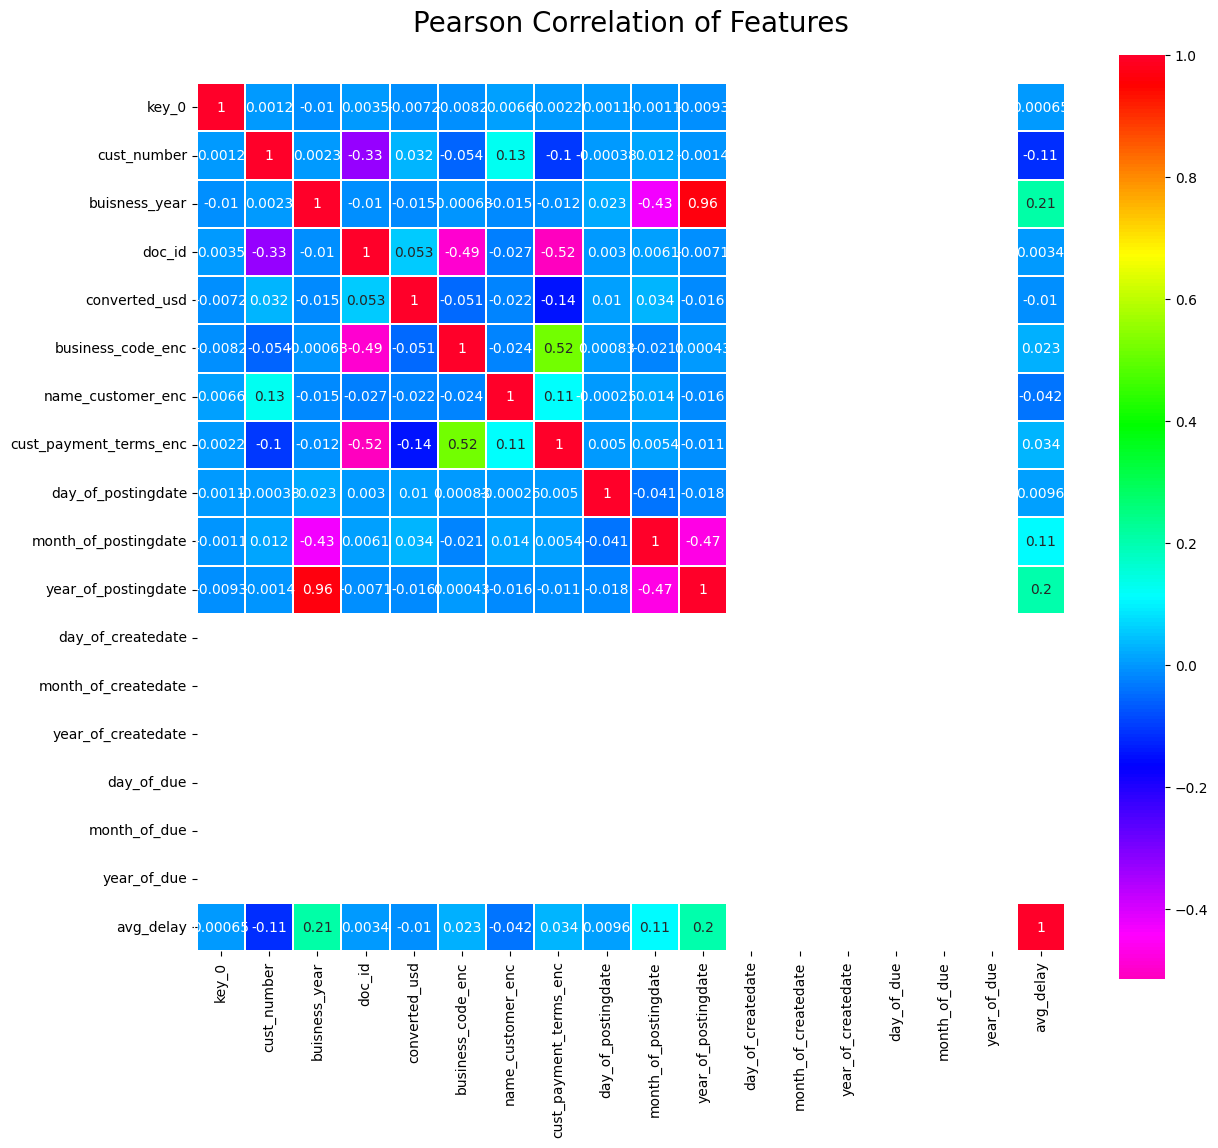

In [97]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [98]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [99]:
sel.variances_

array([1.80026709e+15, 1.14565117e-01, 8.42533839e+16, 1.31489823e+09,
       2.86434285e-01, 1.03239456e+06, 1.33357580e+02, 7.56451498e+01,
       1.23205020e+01, 1.15145112e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### Features columns are
- 'year_of_createdate'
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression

### You need to make different blank list for different evaluation matrix

- MSE
- R2
- Algorithm

In [100]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [102]:

MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3095810.9677671036

### Display The Comparison Lists

In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[9591665334270.283],[0.1113728800239796],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [105]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegressor')
regressor1=SVR()
regressor1.fit(X_train, y_train)
predict1= regressor1.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for "y_test" and "predicted" dataset and store those data inside respective list for comparison

In [106]:
MSE_Score.append(mean_squared_error(y_test, predict1))
R2_Score.append(r2_score(y_test, predict1))

### Check the same for the Validation set also

In [107]:
predict_test1= regressor1.predict(X_val)
mean_squared_error(y_val, predict_test1, squared=False)

3293482.5143146445

### Display The Comparison Lists

In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor'],[9591665334270.283, 10829489105763.09],[0.1113728800239796, -0.0033062434405788377],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [109]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor2=DecisionTreeRegressor()
regressor2.fit(X_train, y_train)
predict2= regressor1.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [110]:
MSE_Score.append(mean_squared_error(y_test, predict2))
R2_Score.append(r2_score(y_test, predict2))

### Check the same for the Validation set also

In [111]:
predict_test2= regressor2.predict(X_val)
mean_squared_error(y_val, predict_test2, squared=False)

3343583.0213204636

### Display The Comparison Lists

In [112]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor'],[9591665334270.283, 10829489105763.09, 10829489105763.09],[0.1113728800239796, -0.0033062434405788377, -0.0033062434405788377],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [113]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor3=RandomForestRegressor()
regressor3.fit(X_train, y_train)
predict3= regressor3.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [114]:
MSE_Score.append(mean_squared_error(y_test, predict3))
R2_Score.append(r2_score(y_test, predict3))

### Check the same for the Validation set also

In [115]:
predict_test3= regressor3.predict(X_val)
mean_squared_error(y_val, predict_test3, squared=False)

2472328.5182164754

### Display The Comparison Lists


In [116]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor'],[9591665334270.283, 10829489105763.09, 10829489105763.09, 6356286360889.725],[0.1113728800239796, -0.0033062434405788377, -0.0033062434405788377, 0.41111702235490766],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code

In [117]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [118]:

MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [119]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2715266.572788983

### Display The Comparison Lists


In [120]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[9591665334270.283, 10829489105763.09, 10829489105763.09, 6356286360889.725, 7334589049485.304],[0.1113728800239796, -0.0033062434405788377, -0.0033062434405788377, 0.41111702235490766, 0.3204814267273809],

## You need to make the comparison list into a comparison dataframe

In [121]:
for i in Algorithm, MSE_Score, R2_Score:
  df = pd.DataFrame(i)
df

AttributeError: 'numpy.dtypes.ObjectDType' object has no attribute 'DataFrame'

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [122]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [123]:
mean_squared_error(y_test,predictedfinal,squared=False)

2708244.6435810234

### Calculate the mean Square Error for validation dataset

In [124]:
mean_squared_error(y_val,predict_testfinal,squared=False)

2715266.572788983

### Calculate the R2 score for test

In [125]:
r2_score(y_test, predictedfinal)

0.3204814267273809

### Calculate the R2 score for Validation

In [126]:
r2_score(y_val,predict_testfinal)

0.3177044701439846

### Calculate the Accuracy for train Dataset

In [127]:
regressorfinal.score(X_train,y_train)*100

69.23055985076026

### Calculate the accuracy for validation

In [128]:
regressorfinal.score(X_val,y_val)*100

31.770447014398464

### Calculate the accuracy for test

In [129]:
regressorfinal.score(X_test,y_test)*100

32.04814267273809

## Specify the reason behind choosing your machine learning model

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding
- Step 2 : Day, Month and Year extraction
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns

### Display the Nulldata

In [130]:
nulldata.isnull().sum()

,0
business_code,0
cust_number,0
name_customer,0
clear_date,9367
buisness_year,0
doc_id,0
posting_date,0
due_in_date,0
baseline_create_date,0
cust_payment_terms,0


In [131]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,1970-01-01 00:00:00.020200426,1970-01-01 00:00:00.020200416,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,1970-01-01 00:00:00.020200325,1970-01-01 00:00:00.020200310,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,1970-01-01 00:00:00.020200518,1970-01-01 00:00:00.020200503,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,1970-01-01 00:00:00.020200409,1970-01-01 00:00:00.020200325,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [132]:
nulldata.shape

(9367, 11)

### Check the Description and Information of the nulldata

In [133]:
nulldata.describe

<bound method NDFrame.describe of       business_code cust_number        name_customer clear_date  \
3              CA02  0140105686             SYSC llc        NaT   
7              U001  0200744019              TARG us        NaT   
10             U001  0200418007                  AM         NaT   
14             U001  0200739534           OK systems        NaT   
15             U001  0200353024     DECA corporation        NaT   
...             ...         ...                  ...        ...   
49975          U001  0200769623           WAL-MAR in        NaT   
49980          U001  0200769623  WAL-MAR corporation        NaT   
49982          U001  0200148860             DOLLA co        NaT   
49992          U001  0200900909             SYSCO co        NaT   
49995          U001  0200561861       CO corporation        NaT   

       buisness_year        doc_id posting_date                   due_in_date  \
3             2020.0  2.960623e+09   2020-03-30 1970-01-01 00:00:00.020200410   
7             2020.0  1.930659e+09   2020-03-19 1970-01-01 00:00:00.020200403   
10            2020.0  1.930611e+09   2020-03-11 1970-01-01 00:00:00.020200326   
14            2020.0  1.930788e+09   2020-04-15 1970-01-01 00:00:00.020200430   
15            2020.0  1.930817e+09   2020-04-23 1970-01-01 00:00:00.020200426   
...              ...           ...          ...                           ...   
49975         2020.0  1.930625e+09   2020-03-10 1970-01-01 00:00:00.020200325   
49980         2020.0  1.930851e+09   2020-05-03 1970-01-01 00:00:00.020200518   
49982         2020.0  1.930638e+09   2020-03-11 1970-01-01 00:00:00.020200326   
49992         2020.0  1.930702e+09   2020-03-25 1970-01-01 00:00:00.020200409   
49995         2020.0  1.930797e+09   2020-04-21 1970-01-01 00:00:00.020200506   

               baseline_create_date cust_payment_terms  converted_usd  
3     1970-01-01 00:00:00.020200331               CA10        2309.79  
7     1970-01-01 00:00:00.020200319               NAA8       11173.02  
10    1970-01-01 00:00:00.020200311               NAA8        3525.59  
14    1970-01-01 00:00:00.020200415               NAA8      121105.65  
15    1970-01-01 00:00:00.020200416               NAM2        3726.06  
...                             ...                ...            ...  
49975 1970-01-01 00:00:00.020200310               NAH4       13114.99  
49980 1970-01-01 00:00:00.020200503               NAH4        8899.71  
49982 1970-01-01 00:00:00.020200311               NAA8        4967.06  
49992 1970-01-01 00:00:00.020200325               NAA8        1998.64  
49995 1970-01-01 00:00:00.020200421               NAA8        3187.86  

[9367 rows x 11 columns]>

In [134]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9367 non-null   object        
 1   cust_number           9367 non-null   object        
 2   name_customer         9367 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9367 non-null   float64       
 5   doc_id                9367 non-null   float64       
 6   posting_date          9367 non-null   datetime64[ns]
 7   due_in_date           9367 non-null   datetime64[ns]
 8   baseline_create_date  9367 non-null   datetime64[ns]
 9   cust_payment_terms    9367 non-null   object        
 10  converted_usd         9367 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 878.2+ KB


### Storing the Nulldata into a different dataset
# for BACKUP

In [135]:
nulldata1 = nulldata.copy(deep = True)
nulldata1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,1970-01-01 00:00:00.020200426,1970-01-01 00:00:00.020200416,NAM2,3726.06


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [136]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [137]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use -

*   dt.day
*   dt.month
*   dt.year

In [138]:
#1. Extract day from "clear_date" column and store it into 'day_of_cleardate'
#2. Extract month from "clear_date" column and store it into 'month_of_cleardate'
#3. Extract year from "clear_date" column and store it into 'year_of_cleardate'
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

#4. Extract day from "posting_date" column and store it into 'day_of_postingdate'
#5. Extract month from "posting_date" column and store it into 'month_of_postingdate'
#6. Extract year from "posting_date" column and store it into 'year_of_postingdate'
nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

#7. Extract day from "due_in_date" column and store it into 'day_of_due'
#8. Extract month from "due_in_date" column and store it into 'month_of_due'
#9. Extract year from "due_in_date" column and store it into 'year_of_due'
nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

#10. Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
#11. Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
#12. Extract year from "baseline_create_date" column and store it into 'year_of_createdate'
nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year


### Use Label Encoder1 of all the following columns -
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [139]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])

### Check for the datatypes of all the columns of Nulldata

In [140]:
nulldata.dtypes

,0
business_code,object
cust_number,int64
name_customer,object
clear_date,datetime64[ns]
buisness_year,float64
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
cust_payment_terms,object


### Now you need to drop all the unnecessary columns -

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [141]:
nulldata.drop(["business_code", "baseline_create_date", "due_in_date", "posting_date", "name_customer", "clear_date","cust_payment_terms","day_of_cleardate", "month_of_cleardate","year_of_cleardate"], axis = 1, inplace = True)

### Check the information of the "nulldata" dataframe

In [142]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9367 non-null   int64  
 1   buisness_year           9367 non-null   float64
 2   doc_id                  9367 non-null   float64
 3   converted_usd           9367 non-null   float64
 4   business_code_enc       9367 non-null   int64  
 5   day_of_postingdate      9367 non-null   int32  
 6   month_of_postingdate    9367 non-null   int32  
 7   year_of_postingdate     9367 non-null   int32  
 8   day_of_due              9367 non-null   int32  
 9   month_of_due            9367 non-null   int32  
 10  year_of_due             9367 non-null   int32  
 11  day_of_createdate       9367 non-null   int32  
 12  month_of_createdate     9367 non-null   int32  
 13  year_of_createdate      9367 non-null   int32  
 14  cust_payment_terms_enc  9367 non-null   int6

### Compare "nulldata" with the "X_test" dataframe

- use info() method

In [143]:
nulldata.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9367 non-null   int64  
 1   buisness_year           9367 non-null   float64
 2   doc_id                  9367 non-null   float64
 3   converted_usd           9367 non-null   float64
 4   business_code_enc       9367 non-null   int64  
 5   day_of_postingdate      9367 non-null   int32  
 6   month_of_postingdate    9367 non-null   int32  
 7   year_of_postingdate     9367 non-null   int32  
 8   day_of_due              9367 non-null   int32  
 9   month_of_due            9367 non-null   int32  
 10  year_of_due             9367 non-null   int32  
 11  day_of_createdate       9367 non-null   int32  
 12  month_of_createdate     9367 non-null   int32  
 13  year_of_createdate      9367 non-null   int32  
 14  cust_payment_terms_enc  9367 non-null   int6

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe
- Display all the columns of the Nulldata dataframe
- Store the Nulldata with new sequence into a new dataframe


- Note - The code is given below, no need to change

In [144]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [145]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [146]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [147]:
nulldata2.isnull().sum()

,0
cust_number,0
buisness_year,0
doc_id,0
converted_usd,0
business_code_enc,0
name_customer_enc,0
cust_payment_terms_enc,0
day_of_postingdate,0
month_of_postingdate,0
year_of_postingdate,0


In [148]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,67,2666,5,30,3,2020,1,1,1970,1,1,1970
7,200744019,2020.0,1.930659e+09,11173.02,67,2748,21,19,3,2020,1,1,1970,1,1,1970
10,200418007,2020.0,1.930611e+09,3525.59,67,98,21,11,3,2020,1,1,1970,1,1,1970
14,200739534,2020.0,1.930788e+09,121105.65,67,1996,21,15,4,2020,1,1,1970,1,1,1970
15,200353024,2020.0,1.930817e+09,3726.06,67,726,36,23,4,2020,1,1,1970,1,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,67,2949,34,10,3,2020,1,1,1970,1,1,1970
49980,200769623,2020.0,1.930851e+09,8899.71,67,2947,34,3,5,2020,1,1,1970,1,1,1970
49982,200148860,2020.0,1.930638e+09,4967.06,67,801,21,11,3,2020,1,1,1970,1,1,1970
49992,200900909,2020.0,1.930702e+09,1998.64,67,2714,21,25,3,2020,1,1,1970,1,1,1970


### Now you can pass this dataset into you final model and store it into "final_result"

In [149]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [155]:
import pandas as pd
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [156]:
final_result.head()

,avg_delay
0,1.565160e+09
1,1.566598e+09
2,1.564732e+09
3,1.566103e+09
4,1.562921e+09


In [157]:
final_result.loc[:"avg_delay"]

,avg_delay
0,1.565160e+09
1,1.566598e+09
2,1.564732e+09
3,1.566103e+09
4,1.562921e+09
...,...
9362,1.567370e+09
9363,1.562822e+09
9364,1.567180e+09
9365,1.566990e+09


### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [158]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe

In [159]:
Final.isnull().sum()

,0
key_0,0
business_code,0
cust_number,0
name_customer,0
clear_date,9367
buisness_year,0
doc_id,0
posting_date,0
due_in_date,0
baseline_create_date,0


In [160]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key_0                 9367 non-null   int64         
 1   business_code         9367 non-null   object        
 2   cust_number           9367 non-null   object        
 3   name_customer         9367 non-null   object        
 4   clear_date            0 non-null      datetime64[ns]
 5   buisness_year         9367 non-null   float64       
 6   doc_id                9367 non-null   float64       
 7   posting_date          9367 non-null   datetime64[ns]
 8   due_in_date           9367 non-null   datetime64[ns]
 9   baseline_create_date  9367 non-null   datetime64[ns]
 10  cust_payment_terms    9367 non-null   object        
 11  converted_usd         9367 non-null   float64       
 12  avg_delay             9367 non-null   float32       
dtypes: datetime64[ns](

In [161]:
Final.describe()

,key_0,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd,avg_delay
count,9367.000000,0,9367.0,9.367000e+03,9367,9367,9367,9367.000000,9.367000e+03
mean,25259.029252,NaT,2020.0,2.005149e+09,2020-04-01 02:44:11.094267392,1970-01-01 00:00:00.020200422,1970-01-01 00:00:00.020200370,32037.953968,1.566846e+09
min,3.000000,NaT,2020.0,1.930535e+09,2020-02-27 00:00:00,1970-01-01 00:00:00.020200227,1970-01-01 00:00:00.020200227,0.720000,1.560063e+09
25%,12771.000000,NaT,2020.0,1.930658e+09,2020-03-16 00:00:00,1970-01-01 00:00:00.020200401,1970-01-01 00:00:00.020200316,5612.600000,1.564556e+09
50%,25384.000000,NaT,2020.0,1.930731e+09,2020-03-30 00:00:00,1970-01-01 00:00:00.020200416,1970-01-01 00:00:00.020200331,19046.800000,1.566436e+09
75%,37819.500000,NaT,2020.0,1.930818e+09,2020-04-17 00:00:00,1970-01-01 00:00:00.020200505,1970-01-01 00:00:00.020200417,47641.455000,1.568366e+09
max,49995.000000,NaT,2020.0,2.960636e+09,2020-05-22 00:00:00,1970-01-01 00:00:00.020200710,1970-01-01 00:00:00.020200522,653644.800000,1.586714e+09
std,14393.275314,NaN,0.0,2.657007e+08,NaN,NaN,NaN,35393.410016,3.143375e+06


### Check for the Number of Rows and Columns in your "Final" dataframe

In [162]:
Final.shape

(9367, 13)

### Now, you need to do convert the below fields back into date and time format

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change

In [163]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [164]:
Final['clear_date'].values

array(['2019-08-07T06:36:48.020200410', '2019-08-23T22:13:20.020200403',
       '2019-08-02T07:40:48.020200326', ...,
       '2019-08-30T15:38:40.020200326', '2019-08-28T10:59:12.020200409',
       '2019-09-28T04:52:16.020200506'], dtype='datetime64[ns]')

### Convert the average delay into number of days format

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change

In [165]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column

In [166]:
Final.loc[:,"avg_delay"]

,avg_delay
0,18115.0
1,18131.0
2,18110.0
3,18126.0
4,18089.0
...,...
9362,18140.0
9363,18088.0
9364,18138.0
9365,18136.0


### Now you need to convert average delay column into bucket

- Need to perform binning
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [167]:

bins=[0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [168]:
Final.drop(['key_0', 'avg_delay'], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column

In [169]:
Final["Aging Bucket"].value_counts()

,count
Aging Bucket,
0-15,0
16-30,0
31-45,0
46-60,0
Greatar than 60,0


### Display your final dataset with aging buckets

In [170]:
Final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2019-08-07 06:36:48.020200410,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79,NaN
1,U001,0200744019,TARG us,2019-08-23 22:13:20.020200403,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02,NaN
2,U001,0200418007,AM,2019-08-02 07:40:48.020200326,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59,NaN
3,U001,0200739534,OK systems,2019-08-18 04:39:28.020200430,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65,NaN
4,U001,0200353024,DECA corporation,2019-07-12 08:38:24.020200426,2020.0,1.930817e+09,2020-04-23,1970-01-01 00:00:00.020200426,1970-01-01 00:00:00.020200416,NAM2,3726.06,NaN


### Store this dataframe into the .csv format

In [171]:
#from typing import final
#Final.to_csv('Final_dataset.csv', index=False)
#Final.to_excel('Final_dataset.xls', index=False)
Final.to_csv('HRC60189WK_ISHA_SHUKLA.csv',date_format='%Y-%m-%d')
from google.colab import files
files.download("HRC60189WK_ISHA_SHUKLA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
# Import Drive API and authenticate.
#from google.colab import drive

# Mount your Drive to the Colab VM.
#drive.mount('/gdrive')

# Write the DataFrame to CSV file.
#with open('/gdrive/My Drive/Final_dataset.csv', 'w') as f:
  #Final.to_csv(f)

# END OF THE PROJECT